In [71]:
import matplotlib
import matplotlib.pyplot as plt
from matplotlib.pyplot import MultipleLocator
import numpy as np
import time as t
import warnings
warnings.filterwarnings('ignore')
from sklearn import datasets
from sklearn.datasets import fetch_openml
from sklearn.datasets.base import get_data_home

# 导入mnist数据集
通过sklearn的fetch_openml来进行数据的导入

In [20]:
mnist = fetch_openml("mnist_784")
X, y = mnist['data'], mnist['target'] # X:data，y:label
print(X.shape, y)# 70000 70000

(70000, 784) ['5' '0' '4' ... '4' '5' '6']


# 数据预览
将部分数据转化成图片进行预览

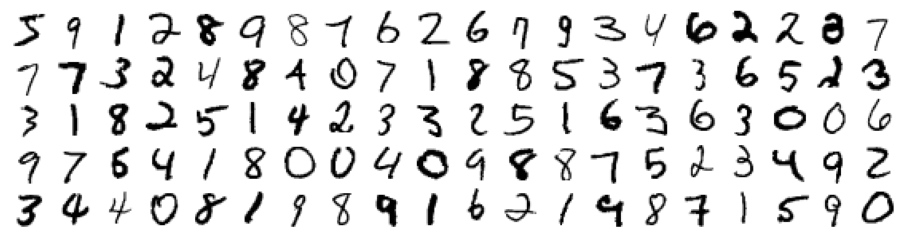

In [23]:
def plot_digits(instances, images_per_row=20, **options):
    size = 28
    images_per_row = min(len(instances), images_per_row)
    images = [instance.reshape(size,size) for instance in instances]
    n_rows = (len(instances) - 1) // images_per_row + 1
    row_images = []
    n_empty = n_rows * images_per_row - len(instances)
    images.append(np.zeros((size, size * n_empty)))
    for row in range(n_rows):
        rimages = images[row * images_per_row : (row + 1) * images_per_row]
        row_images.append(np.concatenate(rimages, axis=1))
    image = np.concatenate(row_images, axis=0)
    plt.imshow(image, cmap = matplotlib.cm.binary, **options)
    plt.axis("off")

plt.figure(figsize=(16,8))
example_images = np.r_[X[:12000:600], X[13000:30600:600], X[30600:60000:590]]
plot_digits(example_images, images_per_row=20)
# save_fig("more_digits_plot")
plt.show()


# 标准化特征
将每个像素点数据进行标准化，使其取值为0-1。通过标准化可以提高分类精度，提升运算速度。
这里采用的是均值-标准差归一化，公式如下:
<center>
${\rm{x' = }}\frac{{x - \mu }}{S}$

这里直接调用sklearn的scaler.fit_transform来进行实现


In [60]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [61]:
#标准化特征
scaler = StandardScaler()

shuffle_index = np.random.permutation(60000)  # 随机排列一个序列，返回一个排列的序列。
X1, y1 = X[shuffle_index[:10000]], y[shuffle_index[:10000]]
# 为了保证学习的效率，只随机取了10000个数据作为训练集进行训练

X_standardized = scaler.fit_transform(X1)




# 数据的划分
由于minist数据的训练集有60000条数据，对KNN算法来说计算量过大。实测k=5时，选取所有数据进行一次判断需耗时近5分钟，当k取值越大时，需要的时间也越久。因此，为了提升效率，这里选取10000条数据进行实验。其中，选取80%作为训练集，20%作为测试集。

In [62]:
def data_division():
    # 随机划分训练集和测试集
    X_train, X_test, y_train, y_test = train_test_split(X_standardized, y1, test_size=0.2)
#     print(X_train.shape, X_test.shape)

In [63]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import learning_curve
from sklearn import metrics


# KNN模型构建
这里使用sklearn的KNerighborsClassifier来构建KNN模型

In [64]:
def knn(k):
    # 测试用，记录算法的时间
    # begin_t = t.time()
    #创建一个有5个邻居的KNN分类器对象
    knn = KNeighborsClassifier(n_neighbors=k, n_jobs=-1)

    #训练模型
    model = knn.fit(X_train, y_train)

    #预测数据
    predictions = model.predict(X_test)

    #测试准确率
    accuracy = metrics.accuracy_score(y_test, predictions)
#     print ("k=",k)
#     print ('accuracy：%.2f%%'%(100*accuracy))
    return 100*accuracy
    # print("Total time: {:.2f}s".format(t.time()-begin_t))

# 计算不同k值的准确率
由于准确率受到数据划分的影响，为了尽可能减小数据划分的干扰，本实验采用多次计算求平均准确率的方法。
在这里，当k取不同值时，选取十次计算的准确率均值作为最终准确率。

k= 1
accuracy：89.20%
k= 2
accuracy：88.70%
k= 3
accuracy：90.75%
k= 4
accuracy：90.50%
k= 5
accuracy：90.40%
k= 6
accuracy：90.35%
k= 7
accuracy：90.65%
k= 8
accuracy：90.55%
k= 9
accuracy：90.45%
k= 10
accuracy：90.55%
k= 11
accuracy：90.70%
k= 12
accuracy：90.60%
k= 13
accuracy：90.75%
k= 14
accuracy：90.80%
k= 15
accuracy：90.75%
k= 16
accuracy：90.55%
k= 17
accuracy：90.55%
k= 18
accuracy：90.30%
k= 19
accuracy：90.30%
k= 20
accuracy：90.35%
k= 21
accuracy：90.25%
k= 22
accuracy：90.40%
k= 23
accuracy：90.25%
k= 24
accuracy：90.25%
k= 25
accuracy：90.05%
k= 26
accuracy：90.15%
k= 27
accuracy：89.95%
k= 28
accuracy：90.00%
k= 29
accuracy：89.95%
k= 30
accuracy：89.95%
k= 31
accuracy：89.75%
k= 32
accuracy：89.80%
k= 33
accuracy：89.75%
k= 34
accuracy：89.90%
k= 35
accuracy：89.85%
k= 36
accuracy：89.70%
k= 37
accuracy：89.75%
k= 38
accuracy：89.65%
k= 39
accuracy：89.65%
k= 40
accuracy：89.70%
k= 41
accuracy：89.65%
k= 42
accuracy：89.60%
k= 43
accuracy：89.55%
k= 44
accuracy：89.60%
k= 45
accuracy：89.60%
k= 46
accuracy：89.7

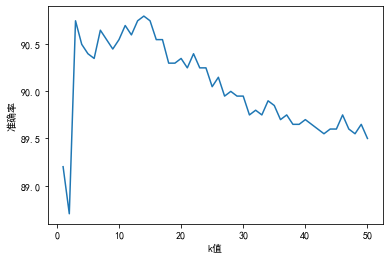

In [89]:
acc = [] # acc用来存放不同k值下的准确率数值
for k in range(1,51):
    accuracy = 0
    for i in range(10):
        data_division() # 每一次数据重新进行划分
        accuracy += knn(k)
    av_accuracy = accuracy/10
    acc.append(av_accuracy)
    print ("k=",k)
    print ('accuracy：%.2f%%'%(av_accuracy))

# 绘制不同k值下的准确率图线
plt.plot(np.arange(1, 51), acc)
# 解决中文显示问题
plt.rcParams['font.sans-serif'] = ['SimHei']
plt.rcParams['axes.unicode_minus'] = False
plt.xlabel("k值")
plt.ylabel("准确率")
# plt.savefig('./demension.jpg')
plt.show()

# 使用fisher进行降维
由于LDA最大降维数<分类数-1，minsit为10分类，因此维度数可以取1-8

In [86]:
# 使用Fisher进行降维 
# 注：LDA最大降维数<分类数-1
# minsit为10分类，因此维度数可以取1-8
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
def mylda(X, y, demension):
    lda = LDA(n_components=demension)
    lda.fit(X, y)
    result_x = lda.transform(X)
    return result_x

# 绘制准确率随纬度的变化图

k= 1
accuracy：31.00%
k= 1
accuracy：47.25%
k= 1
accuracy：68.45%
k= 1
accuracy：77.10%
k= 1
accuracy：80.20%
k= 1
accuracy：83.35%
k= 1
accuracy：86.35%
k= 1
accuracy：89.20%


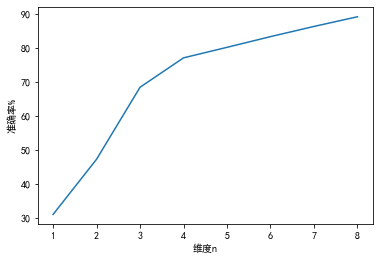

In [85]:
acc = [] # acc用来存放不同k值下的准确率数值
for d in range(1,9):
    lda_x = mylda(X_standardized,y1,d)
    X_train, X_test, y_train, y_test = train_test_split(lda_x, y1, test_size=0.2)
    # 选取不同k值的情况
    k = 3 
    # k = 13
    # k = 23
    accuracy = knn(k)
    acc.append(accuracy)
    print ("k=",k)
    print ('accuracy：%.2f%%'%(accuracy))

# 绘制不同k值下的准确率图线
plt.plot(np.arange(1, 9), acc)
# 解决中文显示问题
plt.rcParams['font.sans-serif'] = ['SimHei']
plt.rcParams['axes.unicode_minus'] = False
plt.xlabel("维度n")
plt.ylabel("准确率%")
# plt.savefig('./demension.jpg')
plt.show()